0 WAR
0    0.253881
1    0.324396
2    0.385676
3    0.449150
4    0.508967
5    0.566434
6    0.623492
7    0.680065
8    0.739193
9    0.785861
Name: bandwidth(GiB/s), dtype: float64
0 WAW_INPLACE
10    0.260180
11    0.265637
12    0.306600
13    0.326327
14    0.343512
15    0.357910
16    0.371392
17    0.390562
18    0.404944
19    0.421433
Name: bandwidth(GiB/s), dtype: float64
0 RAW_NT_STORE
30    0.259610
31    0.404967
32    0.501756
33    0.613400
34    0.720742
35    0.833115
36    0.942545
37    1.052450
38    1.158161
39    1.262280
Name: bandwidth(GiB/s), dtype: float64
0 RAW_FLUSH
40    0.264138
41    0.336732
42    0.327861
43    0.350081
44    0.387462
45    0.412390
46    0.449042
47    0.472457
48    0.506919
49    0.523838
Name: bandwidth(GiB/s), dtype: float64
1 WAR
0     0.280107
1     6.963129
2    14.265050
3    19.811003
4    25.721488
5    31.925830
6    37.882232
7    43.687200
8    49.390521
9    54.819753
Name: bandwidth(GiB/s), dtype: float64
1 WAW_INPLAC

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


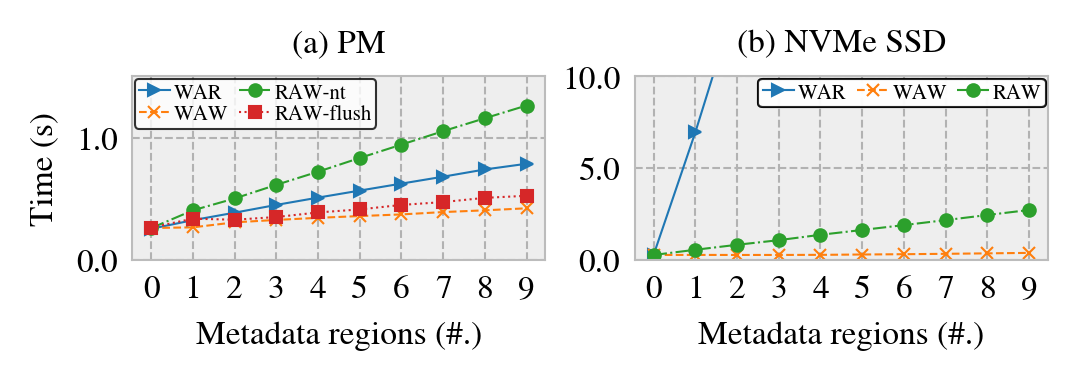

In [6]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("../../../pmbench/performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("../../../killer-nvme/benchmarks/performance-comparison-table", "r") as f:
    df_ssd = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
subtitles = ["(a) PM", "(b) NVMe SSD"]
ops = ["WAR", "WAW_INPLACE", "RAW_NT_STORE", "RAW_FLUSH"]
meta_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
lines = []
cmap = "tab10"
for df_idx, df in enumerate([df, df_ssd]):
    subfig = plt.subplot(1, 2, df_idx + 1)
    for idx, op in enumerate(ops):
        print(df_idx, op)
        if df_idx == 1 and op == "RAW_FLUSH":
            continue
        if df_idx == 1 and op == "RAW_NT_STORE":
            op = "RAW"
        line, = plt.plot(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'], color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=op, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])

        print(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'])
        
        lines.append(line)

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

    plt.xticks(meta_times, [meta_time - 1 for meta_time in meta_times], fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    plt.xlabel("Metadata regions (#.)", fontsize=8) 
    plt.title(subtitles[df_idx], fontsize=8, loc='center')
    # plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    
    if df_idx == 0:
        plt.ylabel('Time (s)', fontsize=8)
    # plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)

    if df_idx == 1:
        plt.ylim(0, 10)
    else:
        plt.ylim(0, 1.5)
    plt.yticks(fontsize=8)
    
    
ops = pd.Series(ops)
ops.replace("WAW_INPLACE", "WAW", inplace=True)
ops.replace("RAW_NT_STORE", "RAW-nt", inplace=True)
ops.replace("RAW_FLUSH", "RAW-flush", inplace=True)

for ax_id, ax in enumerate(fig.axes):

    if ax_id == 0:
        _steps = [4, 0]
        locs = ['upper left', 'lower left']

        for _step_idx, _step in enumerate(_steps):
            loc = locs[_step_idx]
            _start = sum(_steps[:_step_idx])
            _end = _start + _step
            if _step == 0:
                continue
            if _step_idx == 0:
                leg = plt.legend(lines[_start : _end], ops[_start : _end], loc=loc, bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=2, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
            else:
                leg = plt.legend(lines[_start : _end], ops[_start : _end], loc=loc, bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=1, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
        
            frame = leg.get_frame()
            frame.set_facecolor('white')
            frame.set_edgecolor('black')

            plt.gca().add_artist(leg)

    if ax_id == 1:
        _steps = [3, 0]
        locs = ['upper right']
        ops.replace("RAW-nt", "RAW", inplace=True)
        for _step_idx, _step in enumerate(_steps):
            if _step == 0:
                continue
            loc = locs[_step_idx]
            _start = sum(_steps[:_step_idx])
            _end = _start + _step

            leg = plt.legend(lines[_start : _end], ops[_start : _end], loc=loc, bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=3, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
        
            frame = leg.get_frame()
            frame.set_facecolor('white')
            frame.set_edgecolor('black')

            plt.gca().add_artist(leg)


# fig.legend(lines, fss, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
# fig.text(0.03, 0.55, "Throughput (GiB/s)", va='center', rotation='vertical', fontsize=8)
plt.tight_layout(pad=0.4)
# gs0.tight_layout(fig)
plt.savefig("./FIG-IO-Pipeline-Study.pdf", bbox_inches='tight', pad_inches=0)
# plt.savefig("./FIG-IO-Pipeline-Study.svg", bbox_inches='tight', pad_inches=0)

# Overheads

[264.2948215076994, 6963.128840165555, 548.1768515002066, 2716.991138805099]


/home/deadpool/.local/lib/python3.6/site-packages/ipykernel_launcher.py:112: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/deadpool/.local/lib/python3.6/site-packages/ipykernel_launcher.py:114: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


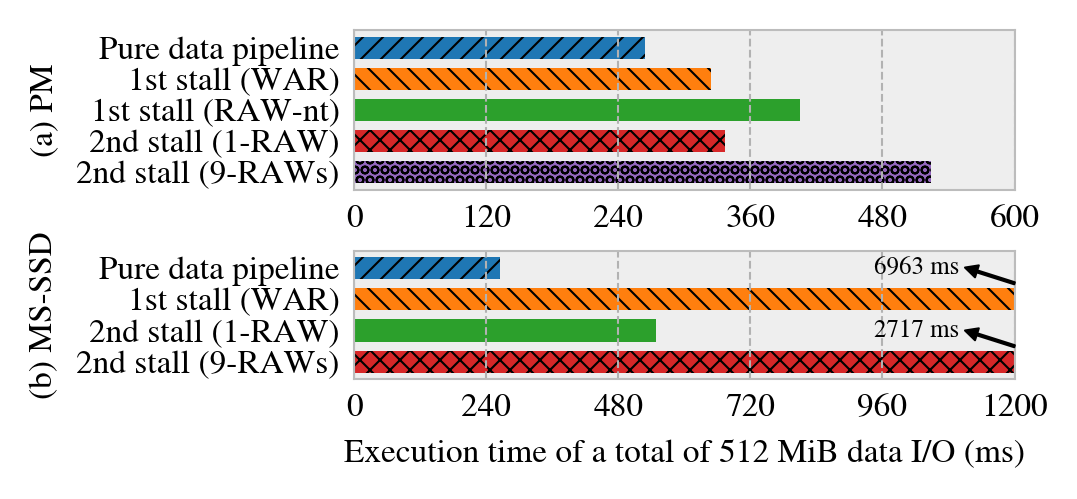

In [5]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "x"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("../../../pmbench/performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("../../../killer-nvme/benchmarks/performance-comparison-table", "r") as f:
    df_ssd = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
gs = GridSpec(2, 1, figure=fig, height_ratios=[5, 4])
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
subtitles = ["(a) PM", "(b) MS-SSD"]
patterns = ['/////', '\\\\\\\\\\', '', 'XXXXX', 'OOOOO', '---', '+++']

# ops = ["Pure Data Pipeline", "WAR", "WAW_INPLACE", "RAW_NT_STORE", "RAW_FLUSH"]
# meta_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
names_pm = ["Pure data pipeline", "1st stall (WAR)", "1st stall (RAW-nt)", "2nd stall (1-RAW)", "2nd stall (9-RAWs)"]
points_pm = [("RAW_FLUSH", 0), ("WAR", 1), ("RAW_NT_STORE", 1), ("RAW_FLUSH", 1), ("RAW_FLUSH", 9)]

names_ssd = ["Pure data pipeline", "1st stall (WAR)", "2nd stall (1-RAW)", "2nd stall (9-RAWs)"]
points_ssd = [("RAW", 0), ("WAR", 1), ("RAW", 1), ("RAW", 9)]

bar_width = 1
true_bar_width = 0.7

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
lines = []
cmap = "tab10"
for df_idx, (df, names, points) in enumerate([(df, names_pm, points_pm), (df_ssd, names_ssd, points_ssd)]):
    subfig = plt.subplot(gs[df_idx, 0])
    # for idx, op in enumerate(ops):
    #     print(df_idx, op)
    #     if df_idx == 1 and op == "RAW_FLUSH":
    #         continue
    #     if df_idx == 1 and op == "RAW_NT_STORE":
    #         op = "RAW"
    #     line, = plt.plot(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'], color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=op, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])

    #     print(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'])
        
    #     lines.append(line)
    times = []
    for point in points:
        times.append(1000 * 512 / 1024 / df[(df['pattern'] == point[0]) & (df['meta_times'] == point[1])]['bandwidth(GiB/s)'].iloc[0])
    
    x = np.arange(len(names))
    
    for idx, time in enumerate(times):
        plt.barh(x[idx], time, color=plt.get_cmap(cmap)(idx), linewidth=0.5, height=true_bar_width, hatch=patterns[idx])

    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

    # plt.xticks(meta_times, [meta_time - 1 for meta_time in meta_times], fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    # plt.xlabel("Metadata regions (#.)", fontsize=8) 
    # plt.title(subtitles[df_idx], fontsize=8, loc='center')

    plt.xticks(fontsize=8)
    if df_idx == 1:
        plt.xlabel('Execution time of a total of 512 MiB data I/O (ms)', fontsize=8)
        plt.xlim(0, 1200)
        plt.xticks(np.linspace(0, 1200, 6), fontsize=8)
        print(times)
        plt.text(1100, 0, str(round(times[1])) + " ms", fontsize=6, ha='right', va='center')
        plt.annotate('', xy=(1110, 0), xytext=(1200, 0.5), arrowprops=dict(facecolor='black', color='black', shrinkA=0, shrinkB=0, headwidth=3, headlength=3, width=0.5))
        plt.text(1100, 2, str(round(times[-1])) + " ms", fontsize=6, ha='right', va='center')
        plt.annotate('', xy=(1110, 2), xytext=(1200, 2.5), arrowprops=dict(facecolor='black', color='black', shrinkA=0, shrinkB=0, headwidth=3, headlength=3, width=0.5))
    else:
        plt.xticks(np.linspace(0, 600, 6), fontsize=8)
    plt.gca().invert_yaxis()
    plt.yticks(x, names, fontsize=8)
    plt.ylabel(subtitles[df_idx], fontsize=8)

plt.tight_layout(pad=0.4)
# gs0.tight_layout(fig)
plt.savefig("./FIG-IO-Pipeline-Study.pdf", bbox_inches='tight', pad_inches=0)
# plt.savefig("./FIG-IO-Pipeline-Study.svg", bbox_inches='tight', pad_inches=0)

# WAW

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


0 WAW_INPLACE
1 WAW_INPLACE


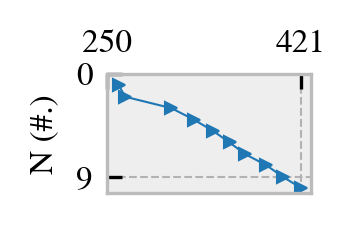

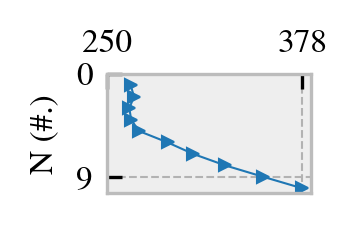

In [12]:
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("../../../pmbench/performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("../../../killer-nvme/benchmarks/performance-comparison-table", "r") as f:
    df_ssd = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
subtitles = ["(a) PM", "(b) NVMe SSD"]
ops = ["WAR", "WAW_INPLACE", "RAW_NT_STORE", "RAW_FLUSH"]
meta_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
bars = []
cmap = "tab10"

for df_idx, df in enumerate([df, df_ssd]):
    fig = plt.figure(dpi = 300, figsize = (cm_to_inch(2.22), cm_to_inch(1.34)))
    for idx, op in enumerate(ops):
        if op != "WAW_INPLACE":
            continue
        print(df_idx, op)
        if df is df_ssd and op == "RAW_FLUSH":
            continue
        if df is df_ssd and op == "RAW_NT_STORE":
            op = "RAW"
        # line, = plt.plot(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'], color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=op, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
        
        # bar = plt.barh(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000, color=plt.get_cmap(cmap)(idx),  linewidth=line_width,label=op, linestyle=line_types[idx])
        # plt.gca().invert_yaxis()
        
        bar = plt.plot(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000, meta_times, color=plt.get_cmap(cmap)(0),  linewidth=line_width,label=op, linestyle=line_types[0], marker='>', markersize=3, markeredgewidth=0.5)
        plt.gca().invert_yaxis()
        
        if df_idx == 0:
            plt.yticks([0, 9], fontsize=8)
            plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
            plt.xticks([250, round(max(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000))], fontsize=8)
            plt.ylabel("N (#.)", fontsize=8)
            plt.savefig("./FIG-IO-WAW-PM.pdf", bbox_inches='tight', pad_inches=0.01)
        else:
            plt.yticks([0, 9], fontsize=8)
            plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
            plt.xticks([250, round(max(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000))], fontsize=8)
            plt.ylabel("N (#.)", fontsize=8)
            plt.savefig("./FIG-IO-WAW-SSD.pdf", bbox_inches='tight', pad_inches=0.01)

# WAR

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


0 WAR
1 WAR


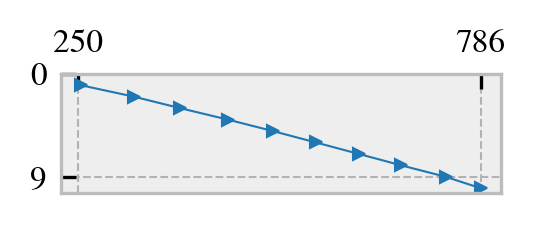

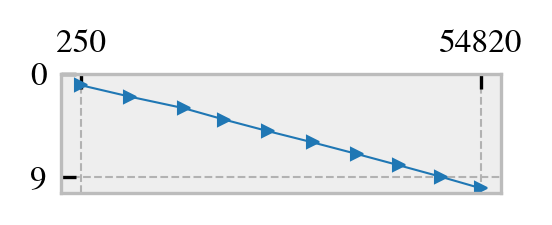

In [10]:
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("../../../pmbench/performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("../../../killer-nvme/benchmarks/performance-comparison-table", "r") as f:
    df_ssd = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
subtitles = ["(a) PM", "(b) NVMe SSD"]
ops = ["WAR", "WAW_INPLACE", "RAW_NT_STORE", "RAW_FLUSH"]
meta_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
bars = []
cmap = "tab10"

for df_idx, df in enumerate([df, df_ssd]):
    fig = plt.figure(dpi = 300, figsize = (cm_to_inch(4.8), cm_to_inch(1.34)))
    for idx, op in enumerate(ops):
        if op != "WAR":
            continue
        print(df_idx, op)
        if df is df_ssd and op == "RAW_FLUSH":
            continue
        if df is df_ssd and op == "RAW_NT_STORE":
            op = "RAW"
        # line, = plt.plot(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'], color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=op, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
        
        # bar = plt.barh(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000, color=plt.get_cmap(cmap)(idx),  linewidth=line_width,label=op, linestyle=line_types[idx])
        # plt.gca().invert_yaxis()
        
        bar = plt.plot(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000, meta_times, color=plt.get_cmap(cmap)(idx),  linewidth=line_width,label=op, linestyle=line_types[idx], marker='>', markersize=3, markeredgewidth=0.5)
        plt.gca().invert_yaxis()
        
        if df_idx == 0:
            plt.yticks([0, 9], fontsize=8)
            plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
            plt.xticks([250, round(max(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000))], fontsize=8)
            # plt.ylabel("N (#.)", fontsize=8)
            plt.savefig("./FIG-IO-WAR-PM.pdf", bbox_inches='tight', pad_inches=0.01)
        else:
            plt.yticks([0, 9], fontsize=8)
            plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
            plt.xticks([250, round(max(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000))], fontsize=8)
            # plt.ylabel("N (#.)", fontsize=8)
            plt.savefig("./FIG-IO-WAR-SSD.pdf", bbox_inches='tight', pad_inches=0.01)

# RAW

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


0 RAW_NT_STORE
0 RAW_FLUSH
1 RAW_NT_STORE
1 RAW_FLUSH


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


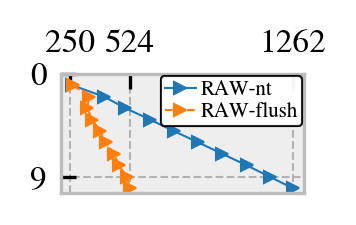

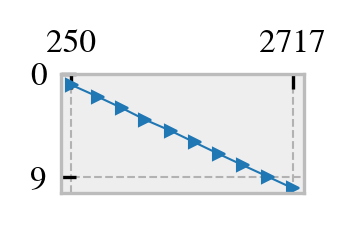

In [9]:
import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("../../../pmbench/performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
with open("../../../killer-nvme/benchmarks/performance-comparison-table", "r") as f:
    df_ssd = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+", "v", "<", "d", "^", "p", "h", "H", "X", "*", "|", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
subtitles = ["(a) PM", "(b) NVMe SSD"]
ops = [ "RAW_NT_STORE", "RAW_FLUSH"]
meta_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
bars = []
cmap = "tab10"
lines = []
for df_idx, df in enumerate([df, df_ssd]):
    fig = plt.figure(dpi = 300, figsize = (cm_to_inch(2.65), cm_to_inch(1.34)))
    for idx, op in enumerate(ops):
        print(df_idx, op)
        if df is df_ssd and op == "RAW_FLUSH":
            continue
        if df is df_ssd and op == "RAW_NT_STORE":
            op = "RAW"
        # line, = plt.plot(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'], color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=op, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
        
        # bar = plt.barh(meta_times, 512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000, color=plt.get_cmap(cmap)(idx),  linewidth=line_width,label=op, linestyle=line_types[idx])
        # plt.gca().invert_yaxis()
        
        line, = plt.plot(512 / 1024 / df[(df['pattern'] == op)]['bandwidth(GiB/s)'] * 1000, meta_times, color=plt.get_cmap(cmap)(idx),  linewidth=line_width,label=op, linestyle=line_types[idx], marker='>', markersize=3, markeredgewidth=0.5)
        lines.append(line)
    plt.gca().invert_yaxis()
    
    if df_idx == 0:
        plt.yticks([0, 9], fontsize=8)
        plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        plt.xticks([250, round(max(512 / 1024 / df[(df['pattern'] == "RAW_FLUSH")]['bandwidth(GiB/s)'] * 1000)), round(max(512 / 1024 / df[(df['pattern'] == "RAW_NT_STORE")]['bandwidth(GiB/s)'] * 1000))], fontsize=8)
        # plt.ylabel("N (#.)", fontsize=8)
        ax = fig.gca()
        leg = plt.legend(lines[0 : 2], ["RAW-nt", "RAW-flush"], loc="upper right", bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=1, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
        
        frame = leg.get_frame()
        frame.set_facecolor('white')
        frame.set_edgecolor('black')
        
        plt.gca().add_artist(leg)
        plt.savefig("./FIG-IO-RAW-PM.pdf", bbox_inches='tight', pad_inches=0.01)
    else:
        plt.yticks([0, 9], fontsize=8)
        plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        plt.xticks([250, round(max(512 / 1024 / df[(df['pattern'] == "RAW")]['bandwidth(GiB/s)'] * 1000))], fontsize=8)
        # plt.ylabel("N (#.)", fontsize=8)
        plt.savefig("./FIG-IO-RAW-SSD.pdf", bbox_inches='tight', pad_inches=0.01)